# Accumulation/Distribution (A/D) oscillator

FF-12	Accumulation/Distribution (A/D) oscillator

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 


https://www.investopedia.com/terms/a/accumulationdistribution.asp  
The accumulation/distribution measure seeks to identify divergences between the stock price and volume flow. This provides insight into how strong a trend is. If the price is rising but the indicator is falling this indicates that buying or accumulation volume may not be enough to support the price rise and a price decline could be forthcoming.

	  
A/D=Previous A/D+CMFV  
CMFV=Current money flow volume  

How to Calculate the Accumulation/Distribution Line  
1 Start by calculating the multiplier. Note the most recent period's close, high, and low to calculate.  
2 Use the multiplier and the current period's volume to calculate the Money Flow Volume.  
3 Add the Money Flow Volume to the last A/D value. For the first calculation use Money Flow Volume as the first value.  
4 Repeat the process as each period ends, adding/subtracting the new Money Flow Volume to/from the prior total. This is A/D.  

Technical indicator without TA-Lib  
https://gist.github.com/imtaehyun/8a6223142e07eaf1ef2215de10ca7a5d  

https://github.com/bukosabino/ta  


In [2]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

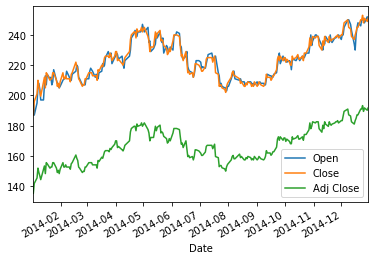

In [3]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

# Accumulation/Distribution (A/D) oscillator



In [5]:
!python -m pip install ta

  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=04842cdeaf8c48cb997e091e28b9edad706366eff18623ec5f7003687012cdc4
  Stored in directory: /home/jovyan/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta


In [6]:

from ta import add_all_ta_features
from ta.utils import dropna

inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

obv = OBV(inputs)
willr_14 = WILLR(inputs)

daily = add_all_ta_features(daily, open="Open", high="High", low="Low", close="Close", volume="Volume")

slowk, slowd = STOCH(inputs, fastk_period=10, prices=['high', 'low', 'close']) # No need for period.!! Check out the C documentation.

daily.loc[:,("OBV")] = obv.tolist()
daily.loc[:,("WilliamsR-14")] = willr_14.tolist()
daily.loc[:,("Stoch-K")] = slowk.tolist()
daily.loc[:,("Stoch-D")] = slowd.tolist()
daily.tail()



/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,High,Low,Open,Close,Volume,Adj Close,OBV,WilliamsR-14,Stoch-K,Stoch-D,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,193.273026,19061100.0,-2.857143,93.217893,88.051948,...,-2.857143,8.317647,243.129319,2.016129,4.009376,11.660023,-7.650647,1.200000,1.192857,35.294118
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,189.453384,17287300.0,-17.142857,89.523810,89.947090,...,-17.142857,9.008824,243.239696,-0.800000,-2.532403,8.821538,-11.353940,-1.976285,-1.996074,32.620321
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,191.745163,19740000.0,-8.571429,90.476190,91.072631,...,-8.571429,9.029412,244.149666,2.448980,-7.243628,5.608505,-12.852132,1.209677,1.202419,34.224599
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,190.217331,17457500.0,-14.285714,85.255732,88.418577,...,-14.285714,9.173529,244.718414,2.049180,-11.512135,2.184377,-13.696512,-0.796813,-0.800004,33.155080
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,191.745163,19760100.0,-8.571429,83.827160,86.519694,...,-8.571429,8.258824,245.400251,5.020921,-15.084623,-1.269423,-13.815199,0.803213,0.800004,34.224599


# Plot of OBV on the original time-series

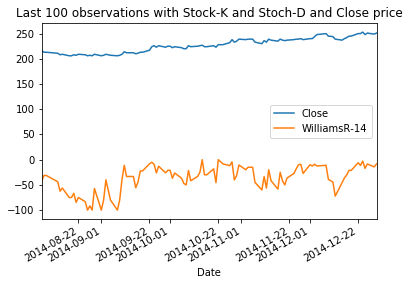

In [4]:
daily[['Close','WilliamsR-14']][-100:].plot(title="Last 100 observations with Stock-K and Stoch-D and Close price")

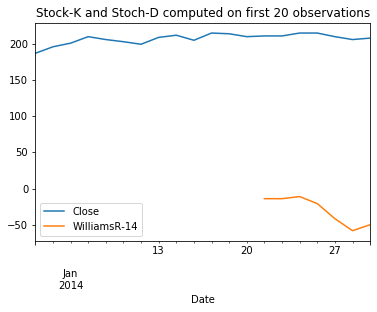

In [5]:
daily[['Close','WilliamsR-14']][:20].plot(title="WilliamsR-14 computed on first 20 observations")

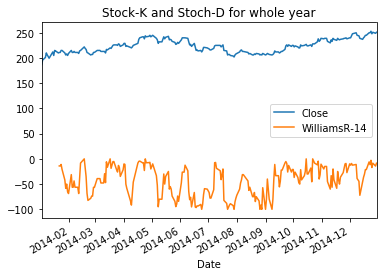

In [6]:
daily[['Close','WilliamsR-14']].plot(title="WilliamsR-14 for whole year")

In [7]:
daily.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'OBV',
       'WilliamsR-14', 'Stoch-K', 'Stoch-D', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_nvi', 'volume_vwap', 'volatility_atr',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index',

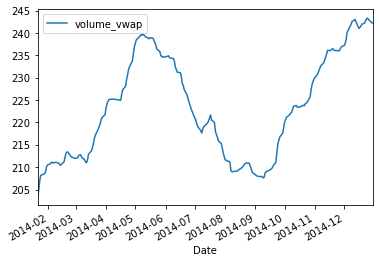

In [12]:
daily[['volume_vwap']].dropna().plot()

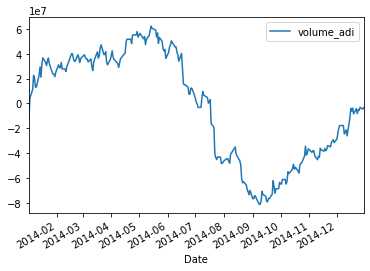

In [15]:
daily[['volume_adi']].dropna().plot()

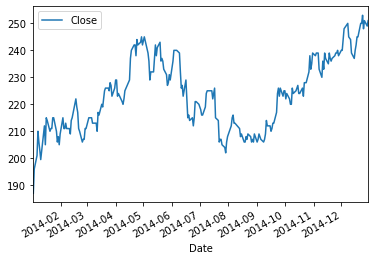

In [17]:
daily[['Close']].dropna().plot()